#### Background: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

#### Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

In [1]:
# Importing Libraries
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
# Reading Dataset from Excel File
ccd=pd.read_excel("CreditCardCustomerData.xlsx")
ccd

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [3]:
## Checking Duplicates
dup_df=ccd[ccd.duplicated(keep='first')]
print("Duplicate size--",dup_df.shape)
dup_df

Duplicate size-- (0, 7)


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


### Observation:
No Duplicates for complete row were found in the dataset

In [4]:
# Finding duplicates in Customer Key
list=np.array(ccd['Customer Key'][ccd.duplicated(['Customer Key'])])
#print(list)
for i in list:
    print(pd.DataFrame(ccd[ccd['Customer Key']==i]))

     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
4        5         47437            100000                   6   
332    333         47437             17000                   7   

     Total_visits_bank  Total_visits_online  Total_calls_made  
4                    0                   12                 3  
332                  3                    1                 0  
     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
391    392         96929             13000                   4   
398    399         96929             67000                   6   

     Total_visits_bank  Total_visits_online  Total_calls_made  
391                  5                    0                 0  
398                  2                    2                 2  
     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
48      49         37252              6000                   4   
432    433         37252             59000                   6   

     Total_visits_b

#### Observation: 
Since only Customer Key is duplicated and not data, so nelecting this error as we would be dropping Customer Key

In [5]:
print('*******************Number of nulls*********************')
print(ccd.isnull().sum())
print('*******************Bank Shape***********************')
print(ccd.shape)
print('*******************Bank Info************************')
print(ccd.info())
print('*******************************************************')

*******************Number of nulls*********************
Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
*******************Bank Shape***********************
(660, 7)
*******************Bank Info************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB
None
*******************************************************


### Observation
1. No Nulls found in the dataset
2. Dataset has 660 rows and 7 columns
3. All columns are continous variables with column datatype as int64

In [6]:
# No of uniques per column
ccd.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [7]:
# Making a new DF without Customer Key and Serial No, i.e with Data Attributes
ccd_DA=ccd.iloc[:,2:]
ccd_DA

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [8]:
ccd_DA.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


### Observations:
1. Avg_Credit_Limit has mean of $34574.24 with Std Dev of 37625.48. It has min of 3000 and max of 200K, it is positively skewed.
2. Total_Credit_Cards has mean of 4.7 with std dev of 2.16, It has min of 1 and max of 10.
3. Total_visits_bank has mean of 2.4 with std dev of 1.63, It has min of 0 and max of 5.
4. Total_visits_online has mean of 2.6 with std dev of 2.93, It has min of 0 and max of 15 and is positvely skewed.
5. Total_calls_made has mean of 3.58 with std dev of 2.86, It has min of 0 and max of 10 and is positvely skewed.

In [9]:
# Checking for Value Counts
for i in ccd_DA.columns:
    print('Column >>',i)
    print(ccd_DA[i].value_counts())

Column >> Avg_Credit_Limit
8000      35
6000      31
9000      28
13000     28
10000     26
          ..
25000      1
153000     1
111000     1
112000     1
106000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64
Column >> Total_Credit_Cards
4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64
Column >> Total_visits_bank
2    158
1    112
3    100
0    100
5     98
4     92
Name: Total_visits_bank, dtype: int64
Column >> Total_visits_online
2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
12      6
10      6
8       6
13      5
11      5
9       4
14      1
6       1
Name: Total_visits_online, dtype: int64
Column >> Total_calls_made
4     108
0      97
2      91
1      90
3      83
6      39
7      35
9      32
8      30
5      29
10     26
Name: Total_calls_made, dtype: int64


Column >> Avg_Credit_Limit
	Data Type >> int64
	Skewness is >> 2.202395623436587
	Min is >> 3000
	Max is >> 200000
	Mean is >> 34574.242424242424
	Median is >> 18000.0
	Std Dev is >> 37625.48780422165
	Range >> 197000
	25% quartile is >> 10000.0
	50% quartile is >> 18000.0
	75% quartile is >> 48000.0
	IQR is >> 38000.0
Left Side Outliers >>
 Series([], Name: Avg_Credit_Limit, dtype: int64)
Right Side Outliers>>
 612    157000
614    163000
615    131000
617    136000
618    121000
619    158000
620    108000
621    166000
622    176000
623    166000
624    178000
626    156000
627    146000
629    155000
630    200000
631    195000
632    187000
633    163000
634    106000
635    114000
636    126000
637    173000
638    153000
639    184000
640    123000
641    144000
644    127000
645    171000
646    186000
647    183000
648    111000
649    112000
650    195000
651    132000
652    156000
654    172000
657    145000
658    172000
659    167000
Name: Avg_Credit_Limit, dtype: int64


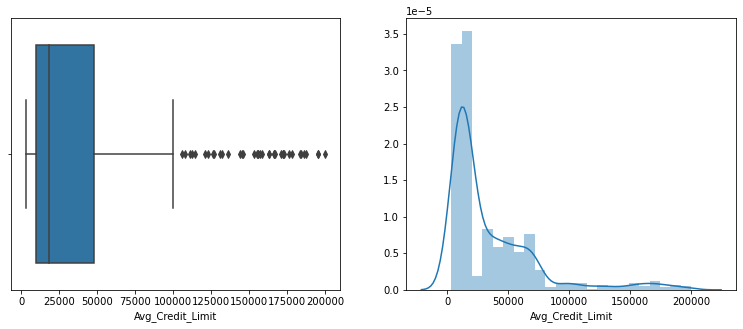

Column >> Total_Credit_Cards
	Data Type >> int64
	Skewness is >> 0.14487899029570606
	Min is >> 1
	Max is >> 10
	Mean is >> 4.706060606060606
	Median is >> 5.0
	Std Dev is >> 2.1678348595111934
	Range >> 9
	25% quartile is >> 3.0
	50% quartile is >> 5.0
	75% quartile is >> 6.0
	IQR is >> 3.0
Left Side Outliers >>
 Series([], Name: Total_Credit_Cards, dtype: int64)
Right Side Outliers>>
 Series([], Name: Total_Credit_Cards, dtype: int64)


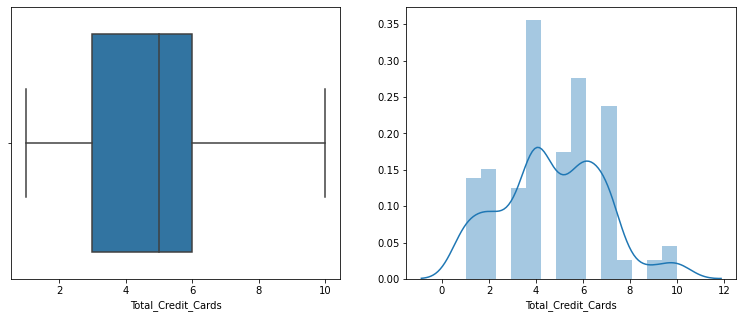

Column >> Total_visits_bank
	Data Type >> int64
	Skewness is >> 0.14189601482438785
	Min is >> 0
	Max is >> 5
	Mean is >> 2.403030303030303
	Median is >> 2.0
	Std Dev is >> 1.6318128757916113
	Range >> 5
	25% quartile is >> 1.0
	50% quartile is >> 2.0
	75% quartile is >> 4.0
	IQR is >> 3.0
Left Side Outliers >>
 Series([], Name: Total_visits_bank, dtype: int64)
Right Side Outliers>>
 Series([], Name: Total_visits_bank, dtype: int64)


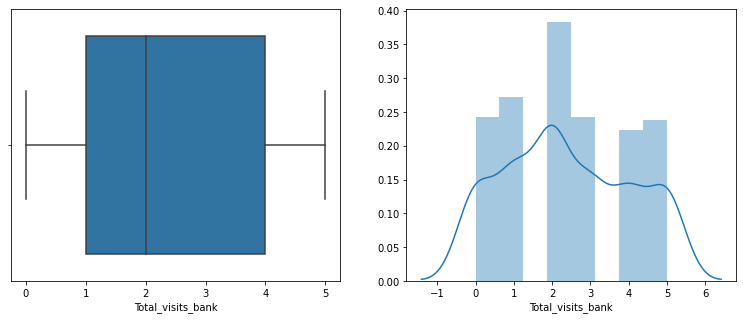

Column >> Total_visits_online
	Data Type >> int64
	Skewness is >> 2.2256067138726565
	Min is >> 0
	Max is >> 15
	Mean is >> 2.606060606060606
	Median is >> 2.0
	Std Dev is >> 2.9357241204935414
	Range >> 15
	25% quartile is >> 1.0
	50% quartile is >> 2.0
	75% quartile is >> 4.0
	IQR is >> 3.0
Left Side Outliers >>
 Series([], Name: Total_visits_online, dtype: int64)
Right Side Outliers>>
 1      10
4      12
6      11
612    14
613    11
615    10
616    11
617    13
618    13
619    13
620    15
621    12
622    15
624    11
626    10
627    12
628    15
630    13
631    15
633    10
637    11
639    15
640    15
641    10
642     9
644    15
645    15
647     9
650    12
651    12
653    15
654     9
655    10
656    13
657     9
658    15
659    12
Name: Total_visits_online, dtype: int64


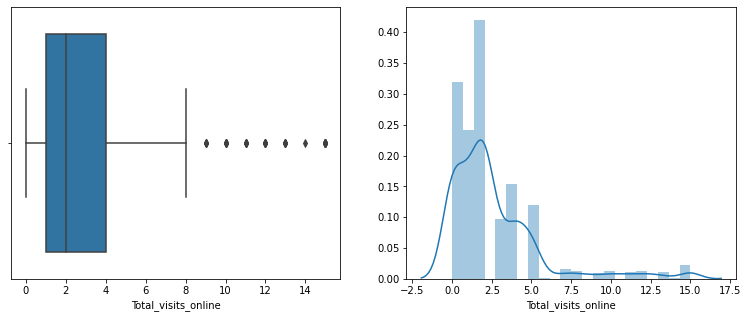

Column >> Total_calls_made
	Data Type >> int64
	Skewness is >> 0.6589053024181467
	Min is >> 0
	Max is >> 10
	Mean is >> 3.5833333333333335
	Median is >> 3.0
	Std Dev is >> 2.865316817622708
	Range >> 10
	25% quartile is >> 1.0
	50% quartile is >> 3.0
	75% quartile is >> 5.0
	IQR is >> 4.0
Left Side Outliers >>
 Series([], Name: Total_calls_made, dtype: int64)
Right Side Outliers>>
 Series([], Name: Total_calls_made, dtype: int64)


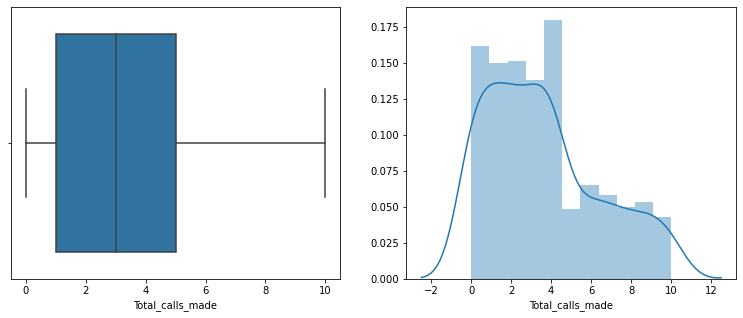

In [10]:
# Univariate Analysis with Box plots and Dist plots
for i in ccd_DA.columns:
    print('Column >>',i)
    print('\tData Type >>', ccd_DA[i].dtype)
    print('\tSkewness is >>', ccd_DA[i].skew())
    print('\tMin is >>', ccd_DA[i].min())
    print('\tMax is >>', ccd_DA[i].max())
    print('\tMean is >>',ccd_DA[i].mean())
    print('\tMedian is >>',ccd_DA[i].median())
    print('\tStd Dev is >>',ccd_DA[i].std())
    print('\tRange >>',ccd_DA[i].max()-ccd_DA[i].min())
    Q1=ccd_DA[i].quantile(q=.25)
    Q3=ccd_DA[i].quantile(q=.75)
    IQR=Q3-Q1
    print('\t25% quartile is >>',Q1)
    print('\t50% quartile is >>',ccd_DA[i].quantile(q=.5))
    print('\t75% quartile is >>',Q3)
    print('\tIQR is >>',IQR)
    Box_size=1.5*(IQR)
    print("Left Side Outliers >>\n",ccd_DA[i][ccd_DA[i] <(Q1-Box_size)])
    print("Right Side Outliers>>\n",ccd_DA[i][ccd_DA[i] >(Q3+Box_size)])
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
    sns.boxplot(x=ccd_DA[i],ax=ax1)
    sns.distplot(ccd_DA[i],ax=ax2)
    plt.show()

### Observations:
1. Avg_Credit_Limit has outliers on the right side, the max provided Credit limit lies in the range of 3000 to 18000
2. Total_Credit_Cards has no outliers and most people have Credit cards in the range of 3-4
3. Total_visits_bank has no outliers and most people visited in the range of 2-3 times
4. Total_visits_online has outlers on the right side, most people visited bank online in the range of 0 - 2 times.
5. Total_calls_made has no outliers and most people called 0 - 4 times.

In [11]:
# Scaling the Dataset
ccd_scaled=ccd_DA.apply(zscore)
ccd_scaled 

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


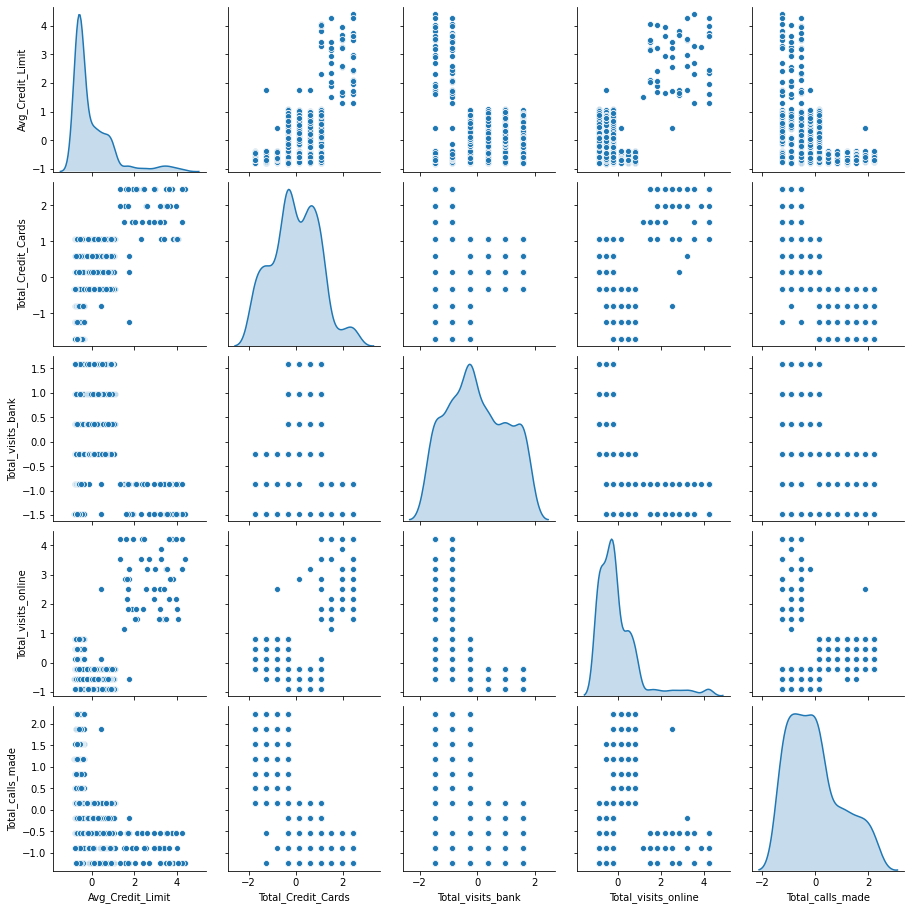

In [12]:
sns.pairplot(ccd_scaled, diag_kind='kde')

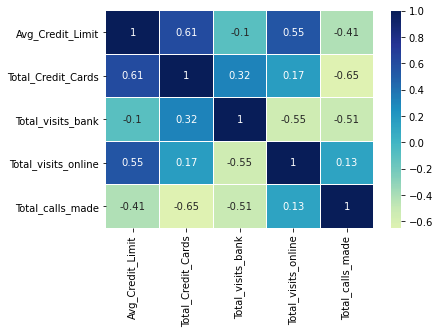

In [13]:
# Getting Correlation
sns.heatmap(ccd_scaled.corr(),annot=True,linewidths=.1,center=0,cmap="YlGnBu")

### Observations:
1. Avg_Credit_Limit has positive correlation with Total_Credit_Cards and Total_visits_online and negative corralation with Total_calls_made. Looks like to have 4 clusters
2. Total_Credit_Cards has positive correlation with Avg_Credit_Limit and negative corralation with Total_calls_made. It has 4 peaks.
3. Total_visits_bank is negatively correlated with Total_visits_online and Total_calls_made. It has 4 peaks.
4. Total_visits_online has positive correlation with Avg_Credit_Limit and negative corralation with Total_visits_bank. It has 4 peaks.
5. Total_calls_made has negative corralation with Avg_Credit_Limit, Total_Credit_Cards and Total_visits_bank. It has 3 peaks, so 3 clusters.

### K Means Clustering


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

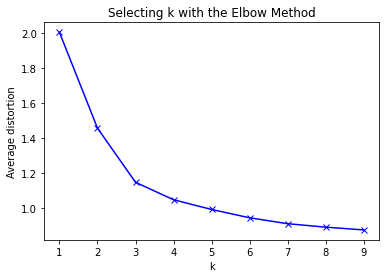

In [14]:
#Finding optimal no. of clusters

clusters=range(1,10)
meanDistortions=[]


for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(ccd_scaled)
    prediction=model.predict(ccd_scaled)
    meanDistortions.append(sum(np.min(cdist(ccd_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / ccd_scaled.shape[0])

    
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Observation:
Based on Elbow method,range for K means clustering is from 3 to 4  

#### Kmeans 3

In [15]:
# Making a copy of Dataset
ccd_scaled_K3=ccd_scaled.copy()
ccd_DA_K3=ccd_DA.copy()

In [16]:
# KMean with Cluster Value = 3
final_model=KMeans(3)
a=final_model.fit_transform(ccd_scaled_K3)
prediction=final_model.predict(ccd_scaled_K3)

# Silhoute_score
score_3=metrics.silhouette_score(ccd_scaled_K3, prediction)

#Append the prediction 
ccd_DA_K3["GROUP"] = prediction
ccd_scaled_K3["GROUP"] = prediction
print("Groups Assigned : \n")
ccd_DA_K3.head(10)

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,2
1,50000,3,0,10,9,0
2,50000,7,1,3,4,2
3,30000,5,1,1,4,2
4,100000,6,0,12,3,1
5,20000,3,0,1,8,0
6,100000,5,0,11,2,1
7,15000,3,0,1,1,0
8,5000,2,0,2,2,0
9,3000,4,0,1,7,0


In [17]:
# Silhouette_score
score_3

0.5157182558881063

In [18]:
# Adding Silhouette score to the dataset
SilScoreDf = pd.DataFrame({'Method':['K Means 3'], 'Silhouette Score': score_3})
SilScoreDf

,Method,Silhouette Score
0,K Means 3,0.515718


In [19]:
# Getting counts per cluster 
ccd_DA_K3["GROUP"].value_counts()

2    386
0    224
1     50
Name: GROUP, dtype: int64

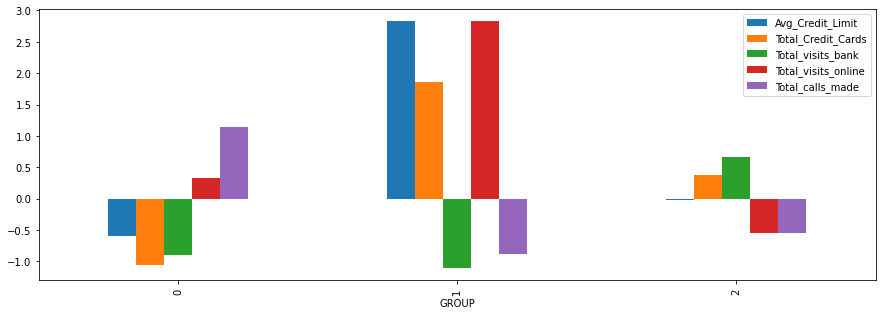

In [20]:
ccd_scaled_K3.groupby(['GROUP']).mean().plot.bar(figsize=(15, 5))

In [21]:
# Grouping the dataset on labels and getting the mean
ccd_DAGrpK3 = ccd_DA_K3.groupby(['GROUP'])
ccd_DAGrpK3.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,33782.383420,5.515544,3.489637,0.981865,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9872e33f40>,
      dtype=object)

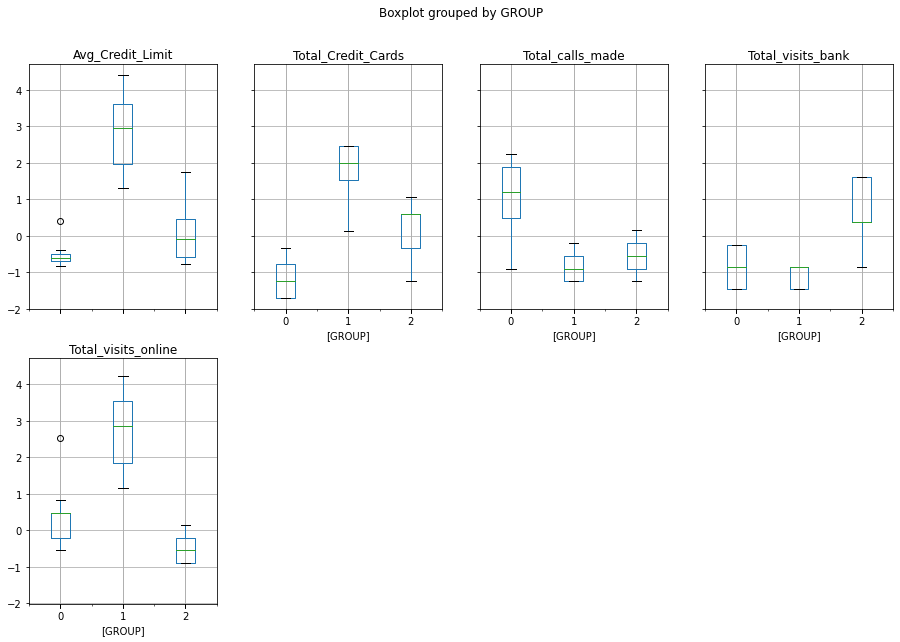

In [22]:
# Plotting Box Plots for the Clusters/Groups
ccd_scaled_K3.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### Observation:
In these results, Credit Card customers have been segmented into 3 clusters. As per Box Plots most distinct clusters are shown by "Avg_Credit_Limit", "Total_Credit_Cards" and by "Total_visits_online". 

Cluster 2 contains lowest no of customers, count being 50. They have high Avg Credit limit, approx 9 credit cards and very high online visits. They have least visits and calls to bank.

Cluster 0 contains max no of 386 customers. They have mediocre Avg Credit Limit, and approx 6 credit cards. They have highest visits to bank approx 3 and approx 2 calls to bank.

Cluster 1 contains 224 customers. They have lowest Avg Credit Limit with approx 2 credit cards, They have avg of 1 visit to bank and avg of 3.5 online visits and have highest calls to bank with an avg of 6.87

#### KMeans 4

In [23]:
# Making a copy of Dataset
ccd_scaled_K4=ccd_scaled.copy()
ccd_DA_K4=ccd_DA.copy()

In [24]:
# KMeans with Cluster = 4
final_model=KMeans(4)
a=final_model.fit_transform(ccd_scaled_K4)
prediction=final_model.predict(ccd_scaled_K4)

# Silhoute_score
score_4=metrics.silhouette_score(ccd_scaled_K4, prediction)

#Append the prediction to the dataset
ccd_DA_K4["GROUP"] = prediction
ccd_scaled_K4["GROUP"] = prediction
print("Groups Assigned : \n")
ccd_DA_K4.head(10)

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2
5,20000,3,0,1,8,1
6,100000,5,0,11,2,2
7,15000,3,0,1,1,0
8,5000,2,0,2,2,1
9,3000,4,0,1,7,1


In [25]:
# Silhoute Score
score_4

0.3556670619372605

In [26]:
# Adding Sihouette score to the dataset
SilScoreDf.loc[1]=["K Means 4",score_4]

In [27]:
# Grouping the dataset on labels and getting the mean
ccd_DAGrp = ccd_DA_K4.groupby(['GROUP'])
ccd_DAGrp.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,35904.522613,5.522613,2.477387,0.969849,2.075377
1,12167.420814,2.393665,0.927602,3.574661,6.923077
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,31226.315789,5.478947,4.515789,1.010526,1.936842


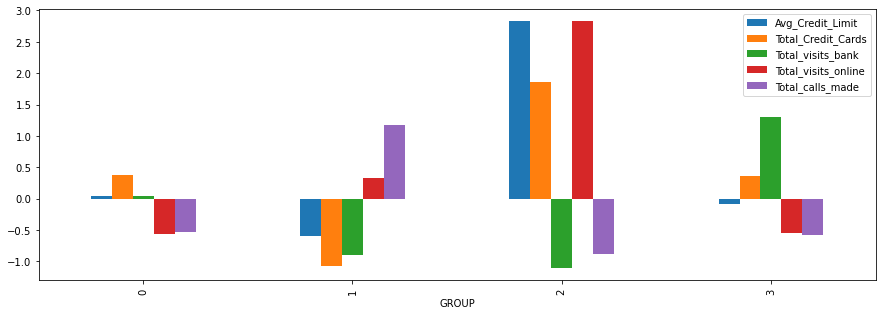

In [28]:
# Plotting Scaled group dataset with mean for diff features
ccd_scaled_K4.groupby(['GROUP']).mean().plot.bar(figsize=(15, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f987b043fd0>,
      dtype=object)

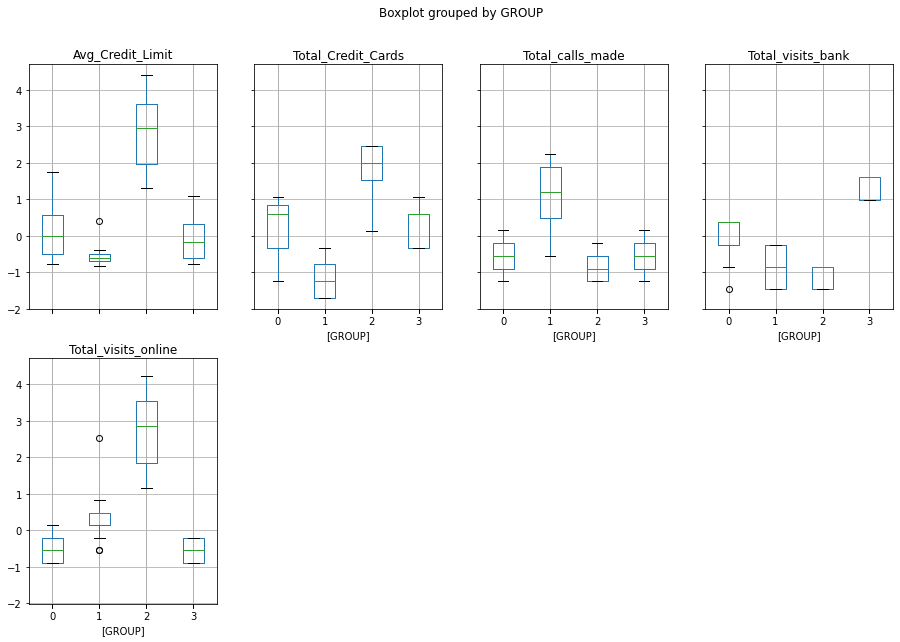

In [29]:
# Plotting Box Plots for the Clusters/Groups
ccd_scaled_K4.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### Observation:
With K Means for 4, is not giving a distinct clusters, so K Means with 3 is better, also Silhoute Coeff of Cluster Value 3 is higher than with Cluster value of 4

# Hierarchical Clustering

In [30]:
# Making a copy of Dataset
Hrccd_scaled=ccd_scaled.copy()
Hrccd_DA=ccd_DA.copy()
# Making a copy for using it with HR clustering Linkage Average
Hrccd_scaled_HR_average=Hrccd_scaled.copy()
Hrccd_DA_HR_average=Hrccd_DA.copy()

In [31]:
Hrccd_DA

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


#### Hierarchical Clustering with linkage = average

In [32]:
# Performaing AgglomerativeClustering with 3 clusters
AC_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
AC_model.fit(Hrccd_scaled_HR_average)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [33]:
# Silhouette score
score_HR_avg=metrics.silhouette_score(Hrccd_scaled_HR_average, AC_model.labels_)

print("Silhouette Score--",score_HR_avg)

Silhouette Score-- 0.515922432650965


In [34]:
# Adding Silhouette score to the Dataset
SilScoreDf.loc[2]=["Hier Clus Link Avg",score_HR_avg]

In [35]:
# Adding Labels to th escaled and orig Dataset
Hrccd_scaled_HR_average['labels'] = AC_model.labels_
Hrccd_DA_HR_average['labels'] = AC_model.labels_

# Getting Value Counts per Cluster
Hrccd_scaled_HR_average['labels'].value_counts()

0    387
2    223
1     50
Name: labels, dtype: int64

In [36]:
# Getting mean of the variables per cluster
Hrccd_DA_HR_average.groupby(['labels']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


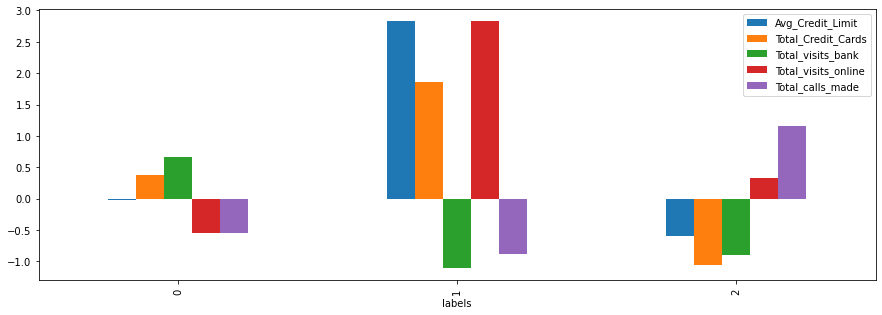

In [37]:
# Plotting Scaled group dataset with mean for diff features
Hrccd_scaled_HR_average.groupby(['labels']).mean().plot.bar(figsize=(15, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f987c153cd0>,
      dtype=object)

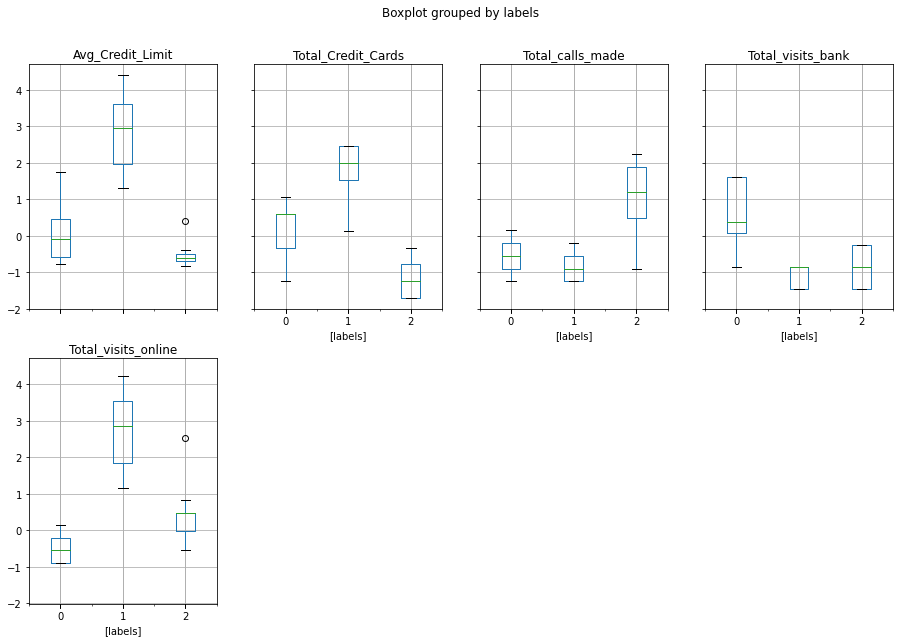

In [38]:
# Plotting BoxPlots for all variables w.r.t to Clusters
Hrccd_scaled_HR_average.boxplot(by='labels', layout = (2,4),figsize=(15,10))

### Observations:
Group 0: This group has the highest mean of Total Visits to Bank and lowest mean of Total Visits Online. For Avg_Credit_Limit, Total_Credit_Cards & Total_calls_made, this Group has mean lying in between Group 1 & 2

Group 1: This group has the highest mean of Avg Credit Limit and Total Credit Cards. Has the Maximum mean no of Total Visits Online and has a clear segregartion of the cluster in this feature. This group has the least mean of total visits to bank. This group has a mean of approx 1 for Total Calls Made.

Group2: This group has the highest mean of Total_Calls_Made and the lowest mean of Total_Credit_Cards. These 2 features clearly segregates this group. This group has the least mean for Avg_Credit_Limit. For Total_Visits_online & Total_Visits_bank, this group lie in between Group 0 & 1. 

#### Drawing Dendogram with Linkage = Average

In [39]:
# Calculating Linkage for method "average"
Hrccd_scaled_HR_average_link=Hrccd_scaled_HR_average.drop(['labels'],axis=1)
Z_avg = linkage(Hrccd_scaled_HR_average_link, metric='euclidean', method='average')
c_avg, coph_dists_avg = cophenet(Z_avg , pdist(Hrccd_scaled_HR_average_link))
c_avg

0.8977080867389372

In [40]:
# Adding Cophenitic coeff to the dataset for final comparision
coph_df=pd.DataFrame({"Method": ["Average"],"Cophenetic Coeff":c_avg})
coph_df

,Method,Cophenetic Coeff
0,Average,0.897708


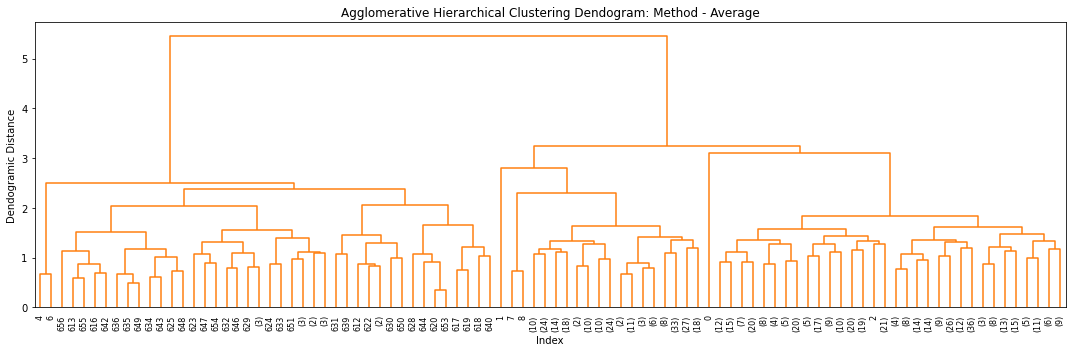

In [41]:
# Drawing Dendogram
plt.figure(figsize=(15, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram: Method - Average')
plt.xlabel('Index')
plt.ylabel('Dendogramic Distance')
dendrogram(Z_avg, leaf_rotation=90.0,p=7,color_threshold=52,leaf_font_size=8,truncate_mode='level')
plt.tight_layout()

### Hierarchical Clustering with linkage = Single

In [42]:
# Copying Dataset for this model
Hrccd_scaled_HR_single=Hrccd_scaled.copy()
Hrccd_DA_HR_single=Hrccd_DA.copy()

In [43]:
# Executing AgglomerativeClustering with linkage single
AC_model_single = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
AC_model_single.fit(Hrccd_scaled_HR_single)
score_HR_single=metrics.silhouette_score(Hrccd_scaled_HR_single, AC_model_single.labels_)
print("Silhouette Score--",score_HR_single)

Silhouette Score-- 0.3742893091424411


In [44]:
# Adding Silhouette Score to Dataset
SilScoreDf.loc[3]=["Hier Clus Link Single",score_HR_single]

In [45]:
# Adding Cluster Labels to the dataset
Hrccd_scaled_HR_single['labels'] = AC_model_single.labels_
Hrccd_DA_HR_single['labels'] = AC_model_single.labels_
Hrccd_scaled_HR_single['labels'].value_counts()

0    609
2     50
1      1
Name: labels, dtype: int64

In [46]:
# Getting mean of the Clusters
Hrccd_DA_HR_single.groupby(['labels']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,25807.881773,4.377668,2.555008,1.912972,3.779967
1,50000.000000,3.000000,0.000000,10.000000,9.000000
2,141040.000000,8.740000,0.600000,10.900000,1.080000


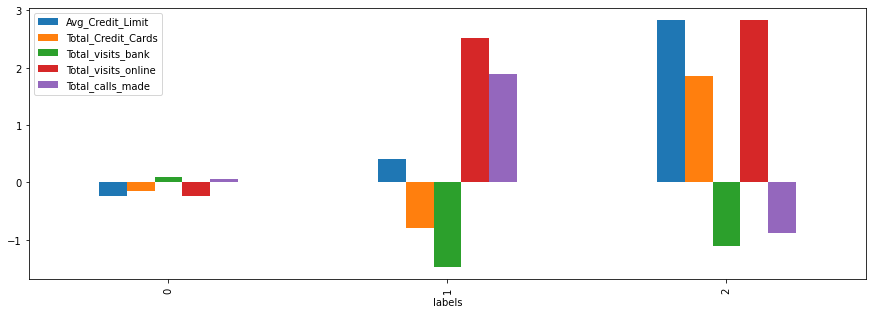

In [47]:
# Plotting Scaled group dataset with mean for diff features
Hrccd_scaled_HR_single.groupby(['labels']).mean().plot.bar(figsize=(15, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f987d129fd0>,
      dtype=object)

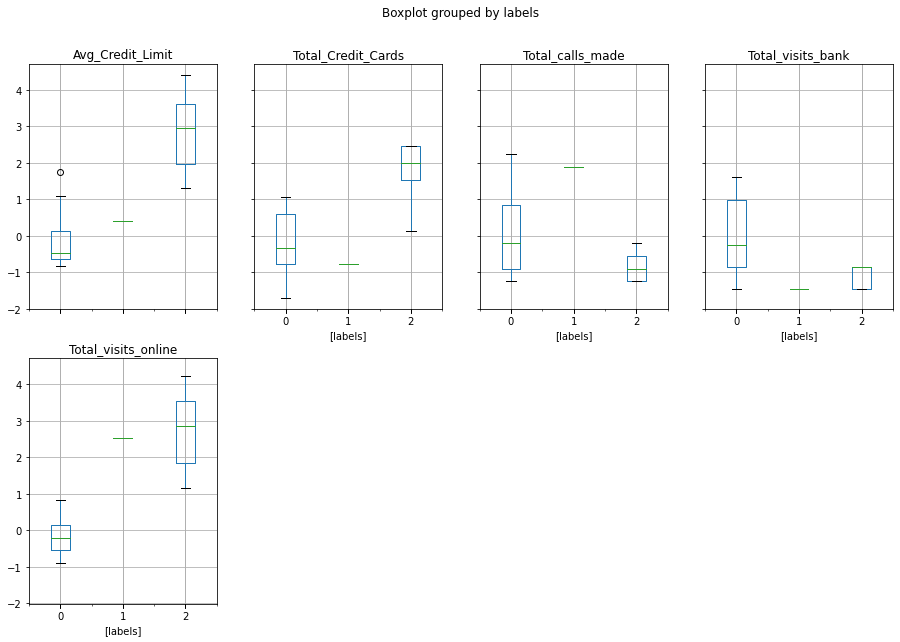

In [48]:
# Plotting BoxPlot for clustered dataset
Hrccd_scaled_HR_single.boxplot(by='labels', layout = (2,4),figsize=(15,10))

### Observations For Linkage=Single:
Group 0: This group has the lowest mean of Avg_Credit_Limit and Total_visits_online, segregating this group. For Total_Visits_bank, Total_Credit_Cards & Total_calls_made, this Group has mean lying in between Group 1 & 2

Group 1: This group has a single entry and the highest mean of Total_calls_made and lowest mean of Total_Vists_Bank and Total_Credit_Cards. For features Total_vistis_online and Avg_credit_limit, the mean lies in between Group 0 & 2.

Group2: This group has the highest mean of Avg_credit_limit(segregates this group), Total_Credit_Cards(segregates this group), and Total_vistis_online. This group has lowest mean of Total_Calls_Made. For Total_vistis_bank, this group lie in between Group 0 & 1. 

#### Drawing Dendogram with Linkage = Single

In [49]:
# Calculating Linkage for method "single"
Hrccd_scaled_HR_single_link=Hrccd_scaled_HR_single.drop(['labels'],axis=1)
Z_single = linkage(Hrccd_scaled_HR_single_link, metric='euclidean', method='single')
c_single, coph_dists_single = cophenet(Z_single , pdist(Hrccd_scaled_HR_single_link))
c_single

0.7391220243806552

In [50]:
# Adding Cophenitic Coeff to the DataSet for final comparision
coph_df.loc[1]=["Single",c_single]

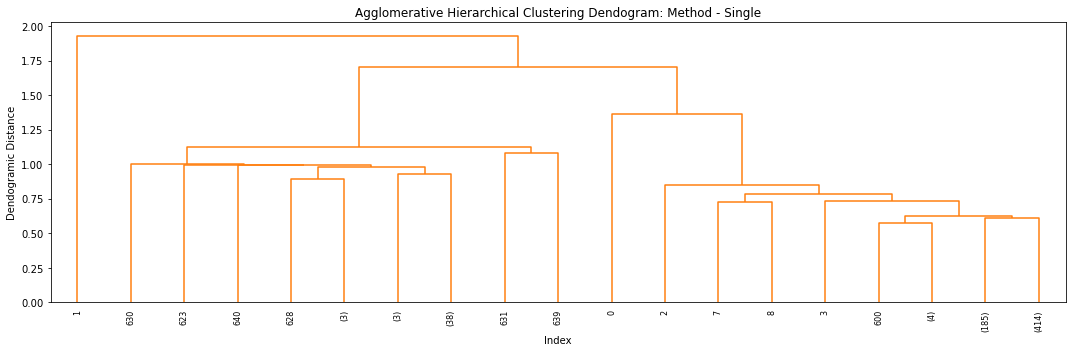

In [51]:
# Drawing Dendogram
plt.figure(figsize=(15, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram: Method - Single')
plt.xlabel('Index')
plt.ylabel('Dendogramic Distance')
dendrogram(Z_single, leaf_rotation=90.0,p=7,color_threshold=52,leaf_font_size=8,truncate_mode='level' )
plt.tight_layout()

### Hierarchical Clustering with linkage = Complete

In [52]:
# Copying Dataset for this model
Hrccd_scaled_HR_comp=Hrccd_scaled.copy()
Hrccd_DA_HR_comp=Hrccd_DA.copy()

In [53]:
# Executing AgglomerativeClustering with linkage 'complete'
AC_model_comp = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
AC_model_comp.fit(Hrccd_scaled_HR_comp)
score_HR_comp=metrics.silhouette_score(Hrccd_scaled_HR_comp, AC_model_comp.labels_)
print("Silhouette Score--",score_HR_comp)

Silhouette Score-- 0.5026435522438492


In [54]:
# Adding Silhouette score to the Dataset
SilScoreDf.loc[4]=["Hier Clus Link Complete",score_HR_comp]

In [55]:
# Adding Cluster Labels to the dataset
Hrccd_scaled_HR_comp['labels'] = AC_model_comp.labels_
Hrccd_DA_HR_comp['labels'] = AC_model_comp.labels_
Hrccd_scaled_HR_comp['labels'].value_counts()

0    397
2    213
1     50
Name: labels, dtype: int64

In [56]:
# Getting mean of the clusters
Hrccd_DA_HR_comp.groupby(['labels']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,33151.133501,5.460957,3.405542,1.010076,2.060453
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12234.741784,2.352113,0.957746,3.633803,7.009390


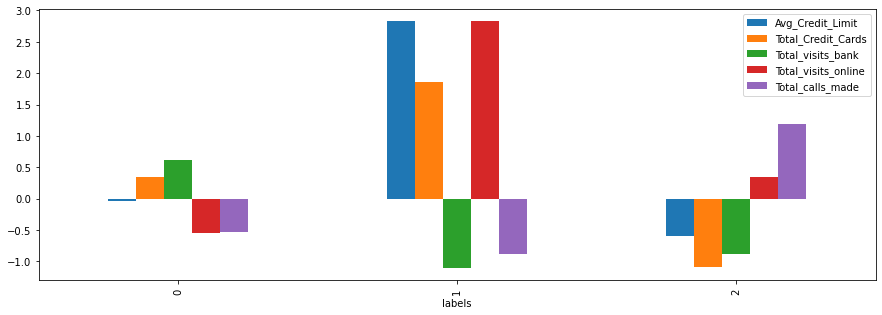

In [57]:
# Plotting Scaled group dataset with mean for diff features
Hrccd_scaled_HR_comp.groupby(['labels']).mean().plot.bar(figsize=(15, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f985ebeaca0>,
      dtype=object)

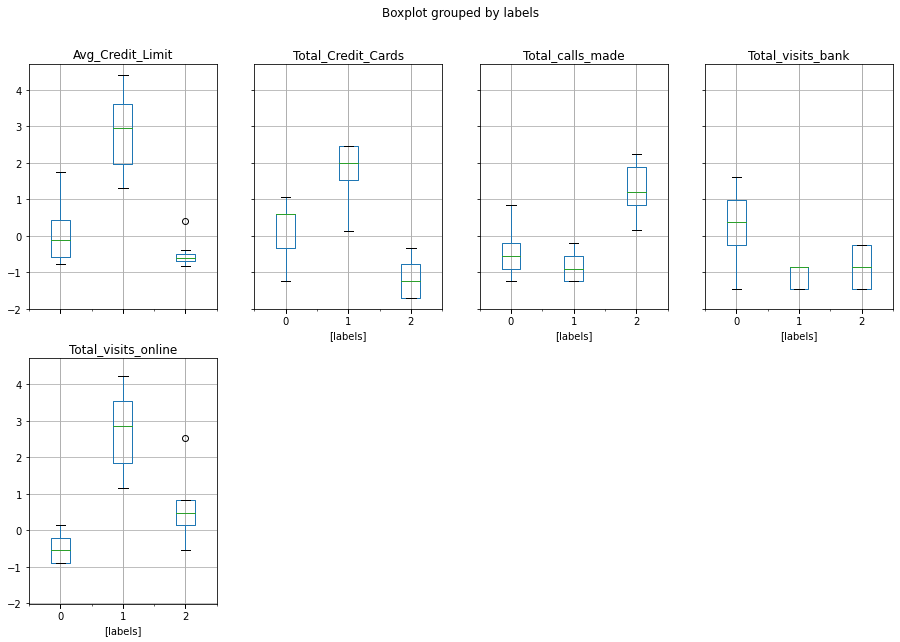

In [58]:
# Plotting BoxPlot for clustered dataset
Hrccd_scaled_HR_comp.boxplot(by='labels', layout = (2,4),figsize=(15,10))

### Observations For Linkage=Complete:
Group 0: This group has the highest mean of Total_visits_Bank and lowest mean of Total_visits_Online(Segregating this group). For Avg_Credit_Limit, Total_Credit_Cards & Total_calls_made, this Group has mean lying in between Group 1 & 2

Group 1: This group has the highest mean of Avg_Credit_Limit and Total_Credit_Cards. Has the Maximum mean no of Total_Visits_Online and has a clear segregartion of the cluster in this feature. This group has the least mean of Total_visits_bank and Total_Calls_Made. This group has a mean of approx 1 for Total_calls_Made.

Group2: This group has the highest mean of Total_Calls_Made and the lowest mean of Total_Credit_Cards. These 2 features clearly segregates this group. This group has the least mean for Avg_Credit_Limit. For Total_Visits_online(clearly segregates the cluster) & Total_Visits_bank, this group lie in between Group 0 & 1.  

#### Drawing Dendogram with Linkage = Complete

In [59]:
# Calculating Linkage for method "complete"
Hrccd_scaled_HR_comp_link=Hrccd_scaled_HR_comp.drop(['labels'],axis=1)
Z_comp = linkage(Hrccd_scaled_HR_comp_link, metric='euclidean', method='complete')
c_comp, coph_dists_comp = cophenet(Z_comp , pdist(Hrccd_scaled_HR_comp_link))
c_comp

0.8599730607972423

In [60]:
# Adding Cophenitic Coeff to the DataSet for final comparision
coph_df.loc[2]=["Complete",c_comp]

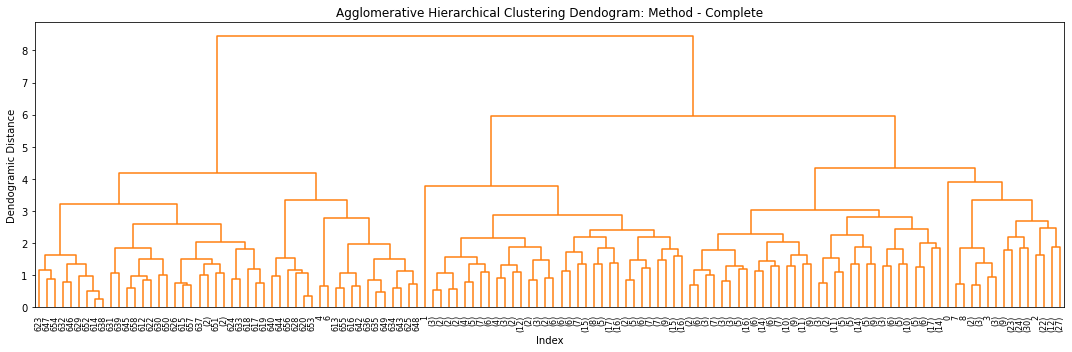

In [61]:
# Drawing Dendogram
plt.figure(figsize=(15, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram: Method - Complete')
plt.xlabel('Index')
plt.ylabel('Dendogramic Distance')
dendrogram(Z_comp, leaf_rotation=90.0,p=7,color_threshold=52,leaf_font_size=8,truncate_mode='level' )
plt.tight_layout()

### Hierarchical Clustering with linkage = Ward

In [62]:
# Copying Dataset for this model
Hrccd_scaled_HR_ward=Hrccd_scaled.copy()
Hrccd_DA_HR_ward=Hrccd_DA.copy()

In [63]:
# Executing AgglomerativeClustering with linkage 'ward'
AC_model_ward = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
AC_model_ward.fit(Hrccd_scaled_HR_ward)
score_HR_ward=metrics.silhouette_score(Hrccd_scaled_HR_ward, AC_model_ward.labels_)
print("Silhouette Score--",score_HR_ward)

Silhouette Score-- 0.5147639589977819


In [64]:
# Adding Silhouette score to the Dataset
SilScoreDf.loc[5]=["Hier Clus Link Ward",score_HR_ward]

In [65]:
# Adding Cluster Labels to the Dataset
Hrccd_scaled_HR_ward['labels'] = AC_model_ward.labels_
Hrccd_DA_HR_ward['labels'] = AC_model_ward.labels_
Hrccd_scaled_HR_ward['labels'].value_counts()

0    385
1    225
2     50
Name: labels, dtype: int64

In [66]:
# Getting mean of the clusters
Hrccd_DA_HR_ward.groupby(['labels']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805
1,12151.111111,2.422222,0.937778,3.546667,6.857778
2,141040.000000,8.740000,0.600000,10.900000,1.080000


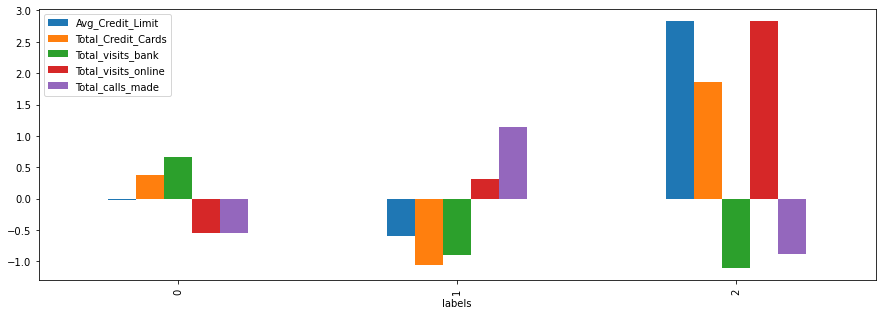

In [67]:
# Plotting Scaled group dataset with mean for diff features
Hrccd_scaled_HR_ward.groupby(['labels']).mean().plot.bar(figsize=(15, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f985e0f4040>,
      dtype=object)

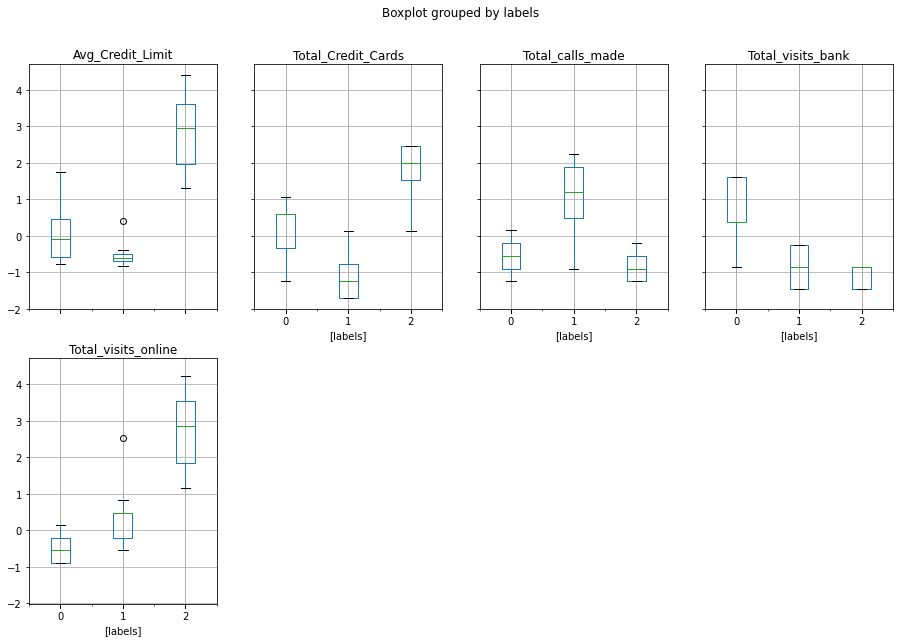

In [68]:
# Plotting BoxPlots for clustered dataset
Hrccd_scaled_HR_ward.boxplot(by='labels', layout = (2,4),figsize=(15,10))

### Observations For Linkage=Ward:
Group 0: This group has the highest mean of Total_visits_Bank and lowest mean of Total_visits_Online(Segregating this group). For Avg_Credit_Limit, Total_Credit_Cards(also Segregates this group) & Total_calls_made, this Group has mean lying in between Group 1 & 2

Group 1: This group has the highest mean of Total_calls_made and lowest mean for Total_Credit_Cards. Noth these features segregate this group. For Total_Visits_Online,Avg_Credit_Limit and Total_visits_bank this group lie in between Group 0 & 2.

Group2: This group has the highest mean of Avg_Credit_Limit, Total_Visits_Online and Total_Credit_Cards, and all these 3 features clearly segregates this cluster. This cluster has the lowest mean for Total_visits_bank and Total_calls_made.

#### Drawing Dendogram with Linkage = Ward

In [69]:
# Calculating Linkage for method "ward"
Hrccd_scaled_HR_ward_link=Hrccd_scaled_HR_ward.drop(['labels'],axis=1)
Z_ward = linkage(Hrccd_scaled_HR_ward_link, metric='euclidean', method='ward')
c_ward, coph_dists_ward = cophenet(Z_ward , pdist(Hrccd_scaled_HR_ward_link))
c_ward

0.7415156284827493

In [70]:
# Adding Cophenitic Coeff to the DataSet for final comparision
coph_df.loc[3]=["Ward",c_ward]

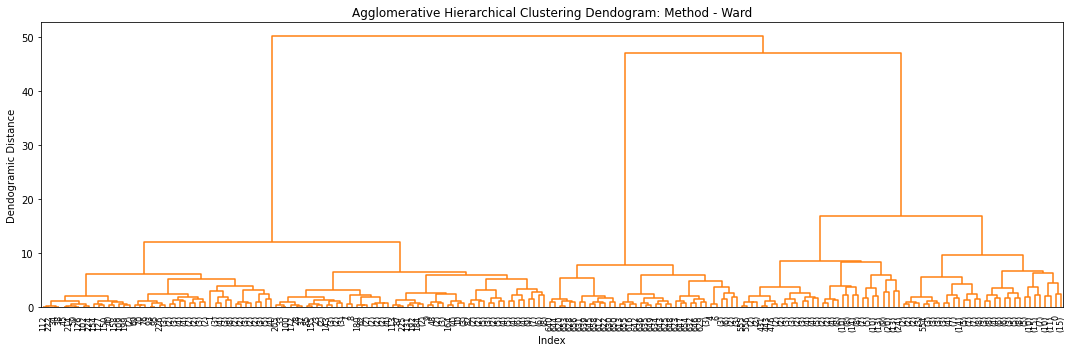

In [71]:
# Drawing Dendogram
plt.figure(figsize=(15, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram: Method - Ward')
plt.xlabel('Index')
plt.ylabel('Dendogramic Distance')
dendrogram(Z_ward, leaf_rotation=90.0,p=7,color_threshold=52,leaf_font_size=8,truncate_mode='level' )
plt.tight_layout()

#### Analysis of Clustering based on Silhouette Scores

In [72]:
# Total Silhoutte scores for K-means and Hieracrchical Clutering Techinques
SilScoreDf

,Method,Silhouette Score
0,K Means 3,0.515718
1,K Means 4,0.355667
2,Hier Clus Link Avg,0.515922
3,Hier Clus Link Single,0.374289
4,Hier Clus Link Complete,0.502644
5,Hier Clus Link Ward,0.514764


### Observation:
Hierachical Clustering with Link Average has the best Silhouette Coeff. 

### Comparing K-Means with Hierarchical Clusters
K means 3 clustering was equivalent to the Hierarchical Clustering done with Linkage being Average. The cluster types were very similar to each other, difference being on only 1 datapoint.
KMeans and Hierarchical Clustering(with Linkage=Average) were better than any other Clustering performed with other Linkage types.
The above Dataset represents the same.

In [73]:
# Coephenitic Coefficients for different Linkage Types
coph_df

,Method,Cophenetic Coeff
0,Average,0.897708
1,Single,0.739122
2,Complete,0.859973
3,Ward,0.741516


### Obervation:
Linkage type Average has the best Cophenitic coeff, meaning the dedongram has the highest Corrlation Coeff between Euclidian and Dendogramic distances and is the most failthful deondogram to the original dataset.

### Task: Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. 

In [74]:
# Comparing KMeans with Hierarical Cluster with Linkage=Average
SilScoreDf

,Method,Silhouette Score
0,K Means 3,0.515718
1,K Means 4,0.355667
2,Hier Clus Link Avg,0.515922
3,Hier Clus Link Single,0.374289
4,Hier Clus Link Complete,0.502644
5,Hier Clus Link Ward,0.514764


In [75]:
# Hierarchical Cluster value counts
Hrccd_scaled_HR_average['labels'].value_counts()

0    387
2    223
1     50
Name: labels, dtype: int64

In [76]:
# Kmeans Cluster Value Counts 
ccd_DA_K3["GROUP"].value_counts()

2    386
0    224
1     50
Name: GROUP, dtype: int64

In [77]:
# Hierarchical Cluster Means 
Hrccd_DA_HR_average.groupby(['labels']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


In [78]:
# Kmeans Cluster Means 
ccd_DAGrpK3.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,33782.383420,5.515544,3.489637,0.981865,2.000000


### Observation:
Kmeans Clustering and Hierachical Clustering for Cluster value 3 are very similar. The difference is of only 1 record for Hierarchical Cluster group 1 & 0 and KMeans Clusters 0 & 2

Kmeans Cluster 0 (count 224) is similar to Hierarchical Cluster 2 (count 223)

Kmeans Cluster 1 (count 386) is similar to Hierarchical Cluster 0 (count 387)

Kmeans Cluster 2 is similar to Hierarchical Cluster 1, count being 50 in both

### Key Questions:

#### How many different segments of customers are there?
There are 3 different segments of the customers. 


#### How are these segments different from each other?
Group One has low Avg_Credit_Limit, less Total_Credit_Cards, with a high mean of No of calls to Bank.

Group Second has a medium Avg_Credit_Limit, with medium no of Total_Credit_Cards, with a high mean of No of visits to bank.

Group Third has very High Avg_Credit_Limit and high no of Total_Credit_Cards with very High Online access to bank

#### What are your recommendations to the bank on how to better market to and service these customers?
Bank needs to improve the Customer Support for Group 0 (Having Highest avg for calls to bank) to improve the perception of the services and the bank and can also target to upsell as they have the lowest no of credit cards.

Bank also need to improve services for Group 1(Having highest Avg no of Visits to Bank) to improve the perception of their support services and educate them to leverage Online services. This group also has the mediocre Avg Gredit and hence can be used to upsell Bank products.

Bank can target group 3 (Having highest Avg Credit) to upsell more products.